In [1]:
 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d saurav9786/amazon-product-reviews

 81% 89.0M/109M [00:00<00:00, 104MB/s]
100% 109M/109M [00:01<00:00, 107MB/s] 


In [5]:
!unzip /content/amazon-product-reviews.zip

Archive:  /content/amazon-product-reviews.zip
  inflating: ratings_Electronics (1).csv  


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data=pd.read_csv('/content/ratings_Electronics (1).csv',names=['userId', 'productId','Rating','timestamp'])
data.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [14]:
data.shape

(7824482, 4)

In [16]:
data=data.iloc[:1048576,0:]

In [17]:
data.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

In [18]:
data.describe()['Rating'].T

count    1.048576e+06
mean     3.973380e+00
std      1.399329e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [19]:
print("Min Rating "+ str(data.Rating.min()))
print("Min Rating "+ str(data.Rating.max()))

Min Rating 1.0
Min Rating 5.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


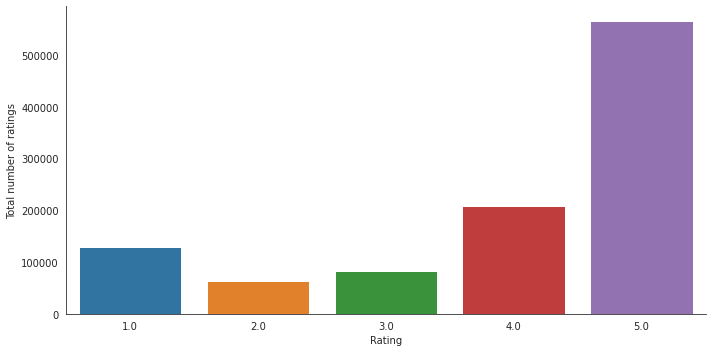

In [20]:
import seaborn as sns
with sns.axes_style('white'):
    g = sns.catplot("Rating", data=data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [21]:
import numpy as np
print("Total No of reviews "+str(data.shape[0]))
print("Total No of users "+str(len(np.unique(data.userId))))
print("Total products "+str(len(np.unique(data.productId))))

Total No of reviews 1048576
Total No of users 786330
Total products 61894


In [22]:
no_of_rates_per_cust=data.groupby(by="userId")['Rating'].count().sort_values(ascending=False)
no_of_rates_per_cust.head()


userId
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
Name: Rating, dtype: int64

In [23]:
new_df=data.groupby("productId").filter(lambda x:x['Rating'].count() >=50)
new_df

,userId,productId,Rating,timestamp
183,A1BKC6B7YHYTVV,0972683275,4.0,1405382400
184,AWVFSIB42LHKJ,0972683275,4.0,1405209600
185,A36MQBNADRH8YY,0972683275,5.0,1405641600
186,A3SRXMPLAEZ6DP,0972683275,4.0,1405987200
187,A20XXTXWF2TCPY,0972683275,5.0,1405123200
...,...,...,...,...
1048571,A1H16CBCNEL4G3,B000IF51UQ,5.0,1356739200
1048572,A1C2OANTC49AQI,B000IF51UQ,5.0,1382486400
1048573,A2JL0387FDDFS,B000IF51UQ,5.0,1340409600
1048574,A2KIYE5RF0OEMY,B000IF51UQ,4.0,1391212800


In [24]:
new_df.groupby('productId')['Rating'].mean().head()


productId
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: Rating, dtype: float64

In [25]:
new_df.groupby('productId')['Rating'].count().sort_values(ascending=False).head()

productId
B0002L5R78    9487
B0001FTVEK    5345
B000I68BD4    4903
B000BQ7GW8    4275
B00007E7JU    3523
Name: Rating, dtype: int64

In [26]:
new_df.groupby('productId')['Rating'].count().sort_values(ascending=False).head()


productId
B0002L5R78    9487
B0001FTVEK    5345
B000I68BD4    4903
B000BQ7GW8    4275
B00007E7JU    3523
Name: Rating, dtype: int64

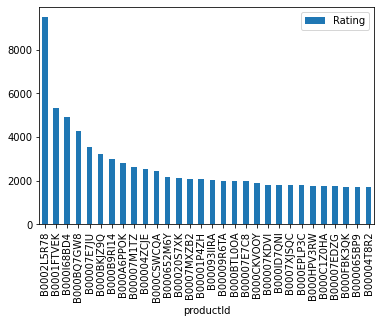

In [27]:
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

In [28]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.3 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633700 sha256=a402c99ceaf1d98397c9f2972aa3b729fcf8c9c91b8b7319612db8201846bb69
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [29]:
from surprise import KNNWithMeans 
from surprise import Dataset
from surprise import Reader
from surprise import accuracy 
import os
from surprise.model_selection import train_test_split

In [30]:
new_df.drop(['timestamp'],axis=1,inplace=True)

In [31]:
new_df

,userId,productId,Rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0
...,...,...,...
1048571,A1H16CBCNEL4G3,B000IF51UQ,5.0
1048572,A1C2OANTC49AQI,B000IF51UQ,5.0
1048573,A2JL0387FDDFS,B000IF51UQ,5.0
1048574,A2KIYE5RF0OEMY,B000IF51UQ,4.0


In [32]:
reader=Reader(rating_scale=(1,5))
data1 = Dataset.load_from_df(new_df,reader)

In [33]:
train_set,test_set=train_test_split(data1,test_size=0.3,random_state=10)

In [34]:
model = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
model.fit(train_set)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [35]:
test_pred=model.test(test_set)

In [36]:
test_pred

[Prediction(uid='A2CTXDLXKOHCEH', iid='B00003CWDH', r_ui=5.0, est=4.050870065449826, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='ABGCDODB3OLPE', iid='B0002D6QJO', r_ui=3.0, est=4.050870065449826, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AIL0HKZRRCE3L', iid='B00097CUIE', r_ui=5.0, est=4.050870065449826, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AQ2SRQCX77658', iid='B000FVDD30', r_ui=5.0, est=4.46122953351869, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='AQR9NP6PBTSPT', iid='B00007LTBA', r_ui=1.0, est=4.050870065449826, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AXOY9UHP9HJNX', iid='B0002L5R78', r_ui=5.0, est=4.050870065449826, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AKLRRKLW8NYRO', iid='B0002344GG', r_ui=1.0,

In [37]:
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.3436


1.343641161111319

In [38]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userId,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
ratings_matrix.shape

(9832, 76)

In [40]:
X=ratings_matrix.T

In [41]:
X.shape

(76, 9832)

In [42]:
X1=X

In [43]:
from sklearn.decomposition import TruncatedSVD
SVD=TruncatedSVD(n_components=10) 
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape


(76, 10)

In [44]:
# # user_movie_table_matrix = csr_matrix(user_movie_table.values)
# model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
# model_knn.fit(new_df)
# # distances, indices = model_knn.kneighbors(new_df.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 6)

In [45]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(76, 76)

In [46]:
i = "9984984354"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

20

In [47]:
correlation_product_ID=correlation_matrix[product_ID]
correlation_product_ID

array([-0.10855979, -0.09400522, -0.29766187, -0.10886378, -0.66114614,
       -0.08214675, -0.13554238,  0.31300645,  0.1278926 , -0.50936144,
        0.82025406,  0.5576079 ,  0.1263287 ,  0.19651767, -0.80376547,
       -0.81181915, -0.93492075,  0.2306736 , -0.10005756,  0.99489134,
        1.        ,  0.67477552,  0.79430954,  0.61708628, -0.13971179,
        0.88791564, -0.02477059,  0.59985095, -0.44107449, -0.13538694,
       -0.96293505,  0.94924997,  0.9791567 ,  0.96120361, -0.97189396,
       -0.2796249 , -0.66047794,  0.22941798, -0.11481663, -0.15394395,
       -0.10172322,  0.96716265, -0.64978022, -0.62299593, -0.80548413,
       -0.87774962, -0.10428497,  0.43512964,  0.13622307, -0.93473968,
        0.54042313,  0.96595252,  0.68948219, -0.61275681, -0.12674791,
       -0.96276823, -0.95098503, -0.12469891,  0.42710752,  0.67621983,
        0.72889345, -0.19096871, -0.57624951, -0.0580377 ,  0.9791783 ,
       -0.44756056, -0.31188843,  0.72704419, -0.1253673 , -0.99

In [48]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:10]

['3744295508',
 '9983891212',
 '9985511476',
 'B000001OM4',
 'B000001ON6',
 'B00000J0D2',
 'B00000J0D5',
 'B00000J0D8',
 'B00000J1SC',
 'B00000J4EY']

In [49]:
new_df[new_df['productId']=='1400501466']

,userId,productId,Rating
1306,A25QXUKICQC047,1400501466,1.0
1307,A1K775TKUNZL43,1400501466,1.0
1308,A1DTMC1668FIDQ,1400501466,1.0
1309,A2YL4R66S69HRR,1400501466,1.0
1310,A3LDPF5FMB782Z,1400501466,5.0
...,...,...,...
1551,AL2XB3XNNUV9J,1400501466,3.0
1552,AFAVGGOEGGYQ,1400501466,5.0
1553,A1089S59XSJT2T,1400501466,5.0
1554,A1VMM5Z5UNEGXD,1400501466,5.0


In [50]:
!pip install caserecommender

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
# coding=utf-8
""""
    Content Based Recommender.

    Literature:
    Guangyuan Piao and John G. Breslin. 2016. Measuring semantic distance for linked open data-enabled recommender
    systems. In Proceedings of the 31st Annual ACM Symposium on Applied Computing (SAC '16). ACM, New York, NY, USA,
    315-320. DOI: https://doi.org/10.1145/2851613.2851839

"""

# © 2019. Case Recommender (MIT License)

import numpy as np

from caserec.recommenders.item_recommendation.base_item_recommendation import BaseItemRecommendation
from caserec.utils.process_data import ReadFile
from caserec.utils.extra_functions import timed

__author__ = 'Eduardo Fressato <eduardofressato@hotmail.com>'


class ContentBased(BaseItemRecommendation):
    def __init__(self, train_file=None, test_file=None, output_file=None, similarity_file=None, similarity_sep='\t',
                 rank_length=10, as_binary=True, sep='\t', output_sep='\t'):

        """
        Content Based Recommender for Item Recommendation

        Usage::

            >> ContentBased(train, test, similarity_file=similarity_file).compute()

        :param train_file: File which contains the train set. This file needs to have at least 3 columns
        (user item feedback_value).
        :type train_file: str

        :param test_file: File which contains the test set. This file needs to have at least 3 columns
        (user item feedback_value).
        :type test_file: str, default None

        :param output_file: File with dir to write the final predictions
        :type output_file: str, default None

        :param similarity_file: File which contains the similarity set. This file needs to have at least 3 columns
        (item item similarity).
        :type similarity_file: str, default None

        :param rank_length: Size of the rank that must be generated by the predictions of the recommender algorithm
        :type rank_length: int, default 10

        :param similarity_sep: Delimiter for similarity or metadata file
        :type similarity_sep: str, default '\t'

        :param sep: Delimiter for input files file
        :type sep: str, default '\t'

        :param output_sep: Delimiter for output file
        :type output_sep: str, default '\t'

        """

        super(ContentBased, self).__init__(train_file=train_file, test_file=test_file, output_file=output_file,
                                           as_binary=as_binary, rank_length=rank_length, sep=sep, output_sep=output_sep)

        self.recommender_name = 'Content Based Algorithm'

        self.similarity_file = similarity_file
        self.similarity_sep = similarity_sep
        self.si_matrix = None
        self.similar_items = None

        self.users_profile = None

    def init_model(self):
        """
        Method to initialize the model. Create and read a similarity matrix

        """
        if self.similarity_file is not None:
            similarity = ReadFile(self.similarity_file, sep=self.similarity_sep, as_binary=False
                                  ).read_metadata_or_similarity()

            self.si_matrix = np.zeros((len(self.items), len(self.items)))

            # Fill similarity matrix
            for i in similarity['col_1']:
                for i_j in similarity['dict'][i]:
                    self.si_matrix[self.item_to_item_id[i], self.item_to_item_id[int(i_j)]] = similarity['dict'][i][i_j]

            # Remove NaNs
            self.si_matrix[np.isnan(self.si_matrix)] = 0.0

        else:
            raise ValueError("This algorithm needs a similarity matrix file!")

    def create_user_profile(self):
        self.users_profile = self.train_set['items_seen_by_user']

    def predict(self):
        for u in self.train_set['users']:
            self.ranking += self.predict_user_rank(u)

    def predict_user_rank(self, user):
        unseen_items = set(self.items).difference(self.users_profile[user])

        list_scores = []
        for i in unseen_items:
            list_scores.append(self.predict_item_score(user, i))

        return sorted(list_scores, key=lambda x: -x[2])[:self.rank_length]

    def predict_item_score(self, user, item):
        sum_sim = 0
        for i in self.users_profile[user]:
            sum_sim += self.si_matrix[self.item_to_item_id[item]][self.item_to_item_id[i]]

        return [user, item, sum_sim / len(self.users_profile[user])]

    def compute(self, verbose=True, metrics=None, verbose_evaluation=True, as_table=False, table_sep='\t', n_ranks=None):
        """
        Extends compute method from BaseItemRecommendation. Method to run recommender algorithm

        :param verbose: Print recommender and database information
        :type verbose: bool, default True

        :param metrics: List of evaluation metrics
        :type metrics: list, default None

        :param verbose_evaluation: Print the evaluation results
        :type verbose_evaluation: bool, default True

        :param as_table: Print the evaluation results as table
        :type as_table: bool, default False

        :param table_sep: Delimiter for print results (only work with verbose=True and as_table=True)
        :type table_sep: str, default '\t'

        :param n_ranks: List of positions to evaluate the ranking
        :type n_ranks: list, None

        """

        super(ContentBased, self).compute(verbose=verbose)

        if verbose:
            print("training_time:: %4f sec" % timed(self.init_model))
            if self.extra_info_header is not None:
                print(self.extra_info_header)

            self.create_user_profile()
            print("prediction_time:: %4f sec" % timed(self.predict))
            print('\n')
        else:
            self.init_model()
            self.create_user_profile()
            self.predict()

        self.write_ranking()

        if self.test_file is not None:
            self.evaluate(metrics, verbose_evaluation, as_table=as_table, table_sep=table_sep, n_ranks=n_ranks)

In [52]:
ContentBased(train_set, test_set, similarity_file= None).compute()

TypeError: ignored